In [11]:
import cv2 as cv
import imutils
import sys
import numpy as np
import matplotlib.pyplot as plt

def contrast_enh(img, low_th, high_th):
    chans = cv.split(img)
    video_frames = []
    for channel in chans:
        hist = cv.calcHist([channel], [0], None, [256], [0, 256])
        for first in range(hist.size):
            if hist[first] > low_th:
                break;

        for last in range(255,-1,-1):
            if hist[last] > high_th:
                break;

        scale = 255 / (last - first)
        offset = first

        channel[channel < first] = 0
        channel[channel > last] = 255
        channel[(channel >= first) & (channel <= last)] = channel[(channel >= first) & (channel <= last)] * scale - offset
        
        final_image = cv.merge([chans[0], chans[1], chans[2]])
        video_frames.append(final_image.copy())
    
    return final_image

In [ ]:
image = cv.imread(cv.samples.findFile("IMAGES/parrot.png"))
for lt in range(0, 6000, 1000):
    img = contrast_enh(image, lt, 10000)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

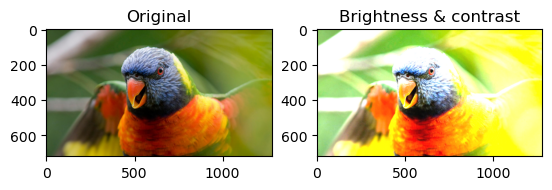

In [18]:
#lot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)) 

# Adjust the brightness and contrast 
# Adjusts the brightness by adding 10 to each pixel value 
brightness = 10
# Adjusts the contrast by scaling the pixel values by 2.3 
contrast = 2.3
image2 = cv.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness) 
 
#Plot the contrast image 
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB)) 
plt.show()
